## Homework 3

#### Runqun Guan 
#### Jul 17, 2018

In [50]:
import math

#permutation function
def P(x,y):
    p = math.factorial(y)/math.factorial(y-x)
    return p

#combination function
def C(x,y):
    c = P(x,y)/math.factorial(x)
    return c

#binomial distribution function
def BD(x,y,p):
    p = C(x,y) * (p**x) * ((1-p)**(y-x))
    return p

#doing factorials is annoying, so I decided to write above functions for this homework. 

#each cell corresponds to one problem. 
#each printed line corresponds to a part in one problem. 

### 1.

In [76]:
#a.
P1a = (1/6)**4 * (5/6)**4
print(P1a)

#b.
P1b = C(4,8) * P1
print(P1b)

0.00037210886297820453
0.026047620408474317


### 2.

In [52]:
#a.
lam = 0.04 * 30
k = 1
P2a = math.e**(lam * (-1)) * (lam**k)/(math.factorial(k))
print(P2a)

#b.
P2b = BD(1,30,0.04)
print(P2b)

0.36143305429464256
0.3673220540383818


### 3.

In [69]:
#a.
one = 0.39
two = 0.24
exactly_one = one - two
print(exactly_one)

#b.
P3b = 1 * 0.15/0.24
print(P3b)

#c.
print('done')

#d.
#let say: the pragnent probability is 25%, thus the unpragent probability is 75%.
P_prg = 0.25
#for a testing tool kits: the ture positive is 98.5%, false positive is 0.8%. 
#therefore, probability of testing pregnant would be:25% + 0.8% x 75%
P_true = 0.25 + 0.08*0.75
P_true_prg = 0.985
#the probability of being pragnant after having a positive result:
P_prg_true = P_true_prg * P_prg / P_true
print('P(pregnant|positive) is',P_prg_true)

0.15000000000000002
0.625
done
P(pregnant|positive) is 0.7943548387096774


### 4.

In [69]:
L = [220, 208, 187, 199, 235, 231, 150, 166, 212]

#mean
mean_ = sum(L)/len(L)
print(mean_)

#variance
vari_sum = (mean_-220)**2+(mean_-208)**2+(mean_-187)**2+(mean_-199)**2+(mean_-235)**2+(mean_-231)**2+(mean_-150)**2+(mean_-166)**2+(mean_-212)**2
vari_ = vari_sum/len(L)
print(vari_)

#standard deviation
stdv = vari_**(1/2)
print(stdv)

#standard deviation of the mean
stdv_mean = stdv/len(L)**(1/2)
print(stdv_mean)

200.88888888888889
734.7654320987654
27.106556994549592
9.035518998183198


### 5.

In [118]:
import numpy as np

#a.
#see paper

#b.
#see paper
546/math.sin(math.pi*5.3/180)

5780.6-5911

x = 1/math.sin(math.pi*5.3/180)
y = 546**2 * 1/math.tan(math.pi*5.3/180) * (math.pi*0.1/180)**2 + 4
z = y ** (1/2)
print ('the derivative error is',x*z)

#c.
J = [3370,3266,3382,3500] #wavelwngth array
k = [41,140,28,84] #error array

d5c = sum(J)/len(J)
print("the average is",d5c)

w = [1/k[i]**2 for i in range(len(k))]
wsum = sum(w) #sum of weight
wJ = [w[i]*J[i]/wsum for i in range(len(J))]
print("the weighted average is",sum(wJ)) #weighted average


#d.
print('the error on the weighted average is',1/wsum)


the derivative error is 40.200852177044695
the average is 3379.5
the weighted average is 3383.77708943916
the error on the weighted average is 484.69855944712066


### 6. 
###### see paper

### 7. 

In [1]:
from numpy import *
%matplotlib inline
from matplotlib.pyplot import *
from astropy.io import ascii
dt = ascii.read('7data.txt')

In [2]:
dt.colnames


['col1', 'col2', 'col3']

In [26]:
def linfit(xdata, ydata, yerror):
    def U(n):
        U_n = sum((xdata**n)/(yerror**2), 0)
        return U_n
    def W(n): 
        W_n = sum(ydata * (xdata**n) / (yerror**2)) 
        return W_n
    D = U(0) * U(2) - (U(1)**2)
    slope = (U(0)*W(1) - U(1)*W(0)) / D
    intercept = (U(2)*W(0) - U(1)*W(1)) / D
    sigma_slope = U(0)/D
    sigma_intercept = U(2)/D
    print("results")
    print("slope = %.3f +/- %.3f"%(slope, sigma_slope))
    print("intercept = %.3f +/- %.3f"%(intercept, sigma_intercept))

x = dt['col1']
y = dt['col2']
yerr = dt['col3']

linfit(x, y, yerr)

results
slope = 290.385 +/- 10.122
intercept = 1.343 +/- 0.549


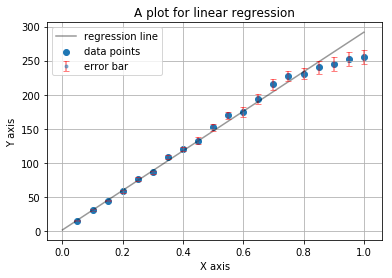

In [48]:
from matplotlib.pyplot import *
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

f = plt.figure()

j = np.linspace(0,max(dt['col1']))
k = 290.385 * j + 1.343
plot(j,k,c='k',alpha=0.4)

scatter(x,y)
plt.errorbar(x, y, yerr=yerr,fmt='.',ecolor = 'r',alpha = 0.5,capsize=3)

plt.title('A plot for linear regression')
plt.xlabel('X axis')
plt.ylabel('Y axis')
grid()
legend(['regression line','data points','error bar'])

#f.savefig("001.pdf", bbox_inches='tight')

In [22]:
#b.
print('the physical meaning of the slope(U/I=R) is resistant of the circuit. ')

#c.
print('the uncertainty of the slope is',10.122)
print('the uncertainty of the intercept is',0.549)

#d.
chi2 = [(dt['col2'][i]-(290.385 * dt['col1'][i]+ 1.343))/dt['col3'][i]**2 for i in range(len(dt['col1']))]
print('the chi-square is',sum(chi2))

v = len(dt['col2'])-2

chii2 = sum(chi2)/v

print('the averaged chi-square is',chii2)

the physical meaning of the slope(U/I=R) is resistant of the circuit. 
the uncertainty of the slope is 10.122
the uncertainty of the intercept is 0.549
the chi-square is 0.0013638888888858336
the averaged chi-square is 7.577160493810187e-05


### scenario 2

In [65]:
#e. 

x_2 = array([dt['col1'][i] for i in range(15)])
y_2 = array([dt['col2'][i] for i in range(15)])
yerr_2 = array([dt['col3'][i] for i in range(15)])

linfit(x_2, y_2, yerr_2)

results
slope = 300.922 +/- 14.575
intercept = -0.136 +/- 0.635


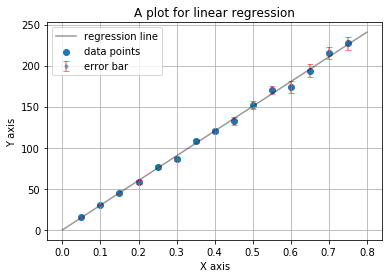

In [66]:
from matplotlib.pyplot import *
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

f = plt.figure()

j = np.linspace(0,dt['col1'][15])
k = 300.922 * j - 0.136
plot(j,k,c='k',alpha=0.4)

scatter(x_2,y_2)
plt.errorbar(x_2, y_2, yerr = yerr_2,fmt='.',ecolor = 'r',alpha = 0.5,capsize=3)

plt.title('A plot for linear regression')
plt.xlabel('X axis')
plt.ylabel('Y axis')
grid()
legend(['regression line','data points','error bar'])

#f.savefig("001.pdf", bbox_inches='tight')

In [68]:
#b.
print('the physical meaning of the slope(U/I=R) is resistant of the circuit. ')

#c.
print('the uncertainty of the slope is',14.575)
print('the uncertainty of the intercept is',0.635)

#d.
chi2_2 = [(y_2[i]-(300.922 * x_2[i]-0.136))/yerr_2[i]**2 for i in range(len(x_2))]
print('the chi-square is',sum(chi2_2))

v = len(y_2)-2

chii2_2 = sum(chi2_2)/v

print('the averaged chi-square is',chii2)

the physical meaning of the slope(U/I=R) is resistant of the circuit. 
the uncertainty of the slope is 14.575
the uncertainty of the intercept is 0.635
the chi-square is 0.0013351111110856476
the averaged chi-square is 7.577160493810187e-05
